# Projet Machine learning  

# Objectif :
- Comprendre du mieux possible nos données 
- prédire les prix des voitures d'occasion avec des caractéristiques données en nous référant sur notre target variable **price**

### Analyse de Forme :
- **Variable target :** price
- **Lignes et colonnes :** 8128, 13
- **Types de variables :**
- **Analyse des valeurs manquantes :**

### Analyse de Fond :
- **Visualisation de la target** : 
- **Signification des variables** :
- **Relation features / target** :




## Analyse de la forme des données 

Importer les librairies utilisées

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from utilities import supprimer_unit,binary_transformation

Importer le fichier csv qui contient le dataset des voitures et les features relatives pour chaque voiture

In [2]:
cars = pd.read_csv('data/Car details v3.csv')

Les dimensions et la description de notre dataset :

In [3]:
cars.shape

(8128, 13)

On voit qu'il faut nettoyer les lignes où des null sont présents :

In [4]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Visualisation des catégories des attributs catégoriels dont certains que l'on transformera :

In [5]:
for col in cars.select_dtypes('object'):
    print(f'{col :-<50} {cars[col].unique()}')
    print('\n')

name---------------------------------------------- ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


fuel---------------------------------------------- ['Diesel' 'Petrol' 'LPG' 'CNG']


seller_type--------------------------------------- ['Individual' 'Dealer' 'Trustmark Dealer']


transmission-------------------------------------- ['Manual' 'Automatic']


owner--------------------------------------------- ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


mileage------------------------------------------- ['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '24.52 kmpl' '19.7 kmpl'
 '22.54 kmpl' '21.0 kmpl' '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '20.3 kmpl'
 '21.4 k

On visualise la proportion des valeurs dans les attributs catégoriels (outre les valeurs numériques)

In [6]:
print(cars['fuel'].value_counts()/cars.shape[0],'\n')
print(cars['transmission'].value_counts()/cars.shape[0],'\n')
print(cars['owner'].value_counts()/cars.shape[0],'\n')
print(cars['seller_type'].value_counts()/cars.shape[0])

Diesel    0.541585
Petrol    0.446727
CNG       0.007013
LPG       0.004675
Name: fuel, dtype: float64 

Manual       0.870817
Automatic    0.129183
Name: transmission, dtype: float64 

First Owner             0.650714
Second Owner            0.258981
Third Owner             0.068282
Fourth & Above Owner    0.021407
Test Drive Car          0.000615
Name: owner, dtype: float64 

Individual          0.832431
Dealer              0.138533
Trustmark Dealer    0.029035
Name: seller_type, dtype: float64


## Preprocessing

On supprime les null puis on reset les index pour qu'ils s'adaptent

In [7]:
cars = cars.dropna(subset=['mileage', 'max_power', 'torque', 'seats'])
cars = cars.reset_index(drop=True) 
cars


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


On remarque bien qu'il n'y a plus de valeur nulle

In [8]:
cars.isnull().sum() 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

On supprime les attributs qui nous paraissent inutiles :

In [9]:
cars = cars.drop(['torque','owner'],axis=1)
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5 kmpl,1197 CC,82.85 bhp,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8 kmpl,1493 CC,110 bhp,5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3 kmpl,1248 CC,73.9 bhp,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57 kmpl,1396 CC,70 bhp,5.0


Ici nous utilisons des fonctions que nous avons définies dans le fichier utilities.py, supprimer_unit pour ne garder que la valeur numérique des attributs cités, et binary_transformation afin d'avoir des valeurs binaires plutôt que des chaines de caractères.

In [10]:
cars = cars.drop(cars[cars.fuel == 'LPG'].index)
cars = cars.drop(cars[cars.fuel == 'CNG'].index)
cars = cars.drop(cars[cars.seller_type == 'Trustmark Dealer'].index)

cars = cars.dropna()
cars = cars.reset_index(drop=True) 

for col in cars.select_dtypes('object'):
    print(f'{col :-<50} {cars[col].unique()}')
    print('\n')

name---------------------------------------------- ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


fuel---------------------------------------------- ['Diesel' 'Petrol']


seller_type--------------------------------------- ['Individual' 'Dealer']


transmission-------------------------------------- ['Manual' 'Automatic']


mileage------------------------------------------- ['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl' '19.3 kmpl' '18.9 kmpl'
 '18.15 kmpl' '24.52 kmpl' '19.7 kmpl' '22.54 kmpl' '21.0 kmpl'
 '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '20.3 kmpl' '21.4 kmpl' '24.7 kmpl'
 '18.2 kmpl' '16.8 kmpl' '24.3 kmpl' '14.0 kmpl' '18.6 kmpl' '23.95 kmpl'
 '17.0 kmpl' '20.63 kmpl' '13.93 kmpl' '16.0 kmpl' '17.8 kmpl' '18.5 kmpl'
 '12.55 kmpl' '12.99 k

In [11]:
supprimer_unit(cars,'max_power','bhp')

In [12]:
supprimer_unit(cars,'mileage', 'kmpl')

In [13]:
supprimer_unit(cars,'engine', 'CC')

In [14]:
cars = cars.apply(LabelEncoder().fit_transform)
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,1218,20,270,731,0,1,1,320,24,64,2
1,1506,20,217,683,0,1,1,272,47,152,2
2,371,12,89,720,1,1,1,173,46,73,2
3,726,16,126,698,0,1,1,312,35,114,2
4,1259,13,69,683,1,1,1,131,25,106,2
...,...,...,...,...,...,...,...,...,...,...,...
7578,716,19,187,659,1,1,1,194,21,86,2
7579,604,13,72,682,0,1,1,148,43,167,2
7580,1230,15,226,683,0,1,1,212,24,61,2
7581,1591,19,167,167,0,1,1,322,35,52,2


In [ ]:
# Equilibrer pour transmission et seller_type

In [24]:
for col in cars:
    print(cars[col].value_counts()/cars.shape[0],'\n')


1218    0.017012
1013    0.010814
1035    0.009363
49      0.008176
1249    0.008044
          ...   
1330    0.000132
1485    0.000132
907     0.000132
1453    0.000132
1832    0.000132
Name: name, Length: 1939, dtype: float64 

23    0.127786
24    0.104576
22    0.103125
21    0.101543
20    0.080839
18    0.079784
19    0.079520
17    0.074113
25    0.067651
16    0.047870
15    0.030463
14    0.025979
13    0.022287
12    0.013319
11    0.010022
26    0.009363
10    0.006726
9     0.004879
8     0.002506
6     0.001978
5     0.001846
4     0.001187
3     0.001187
7     0.000791
0     0.000264
2     0.000264
1     0.000132
Name: year, dtype: float64 

173    0.028089
354    0.027694
203    0.026639
270    0.025188
301    0.023210
         ...   
81     0.000132
22     0.000132
180    0.000132
171    0.000132
413    0.000132
Name: selling_price, Length: 663, dtype: float64 

683    0.066728
496    0.056442
546    0.055915
441    0.053013
351    0.049321
         ...   
265    0.0001

## Régressions

C:\Users\souam\AppData\Local\Temp/ipykernel_3080/1652786502.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_reg = x[:, np.newaxis]
C:\Users\souam\AppData\Local\Temp/ipykernel_3080/1652786502.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_reg = y[:, np.newaxis]


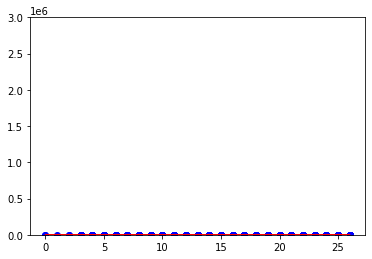

In [16]:
cars_reg = cars[cars['selling_price']<0.3*pow(10,7)] 
'replace'
x = cars_reg.year
y = cars_reg.selling_price

x_reg = x[:, np.newaxis]
y_reg = y[:, np.newaxis]

plt.ylim(0,0.3*pow(10,7))
model = LinearRegression()
 
model.fit(x_reg,y_reg)
y_predict = model.predict(x_reg)
 
plt.scatter(x_reg, y_reg, color='b')
plt.plot(x_reg, y_predict, color='red')
plt.show()

115.8480992886912


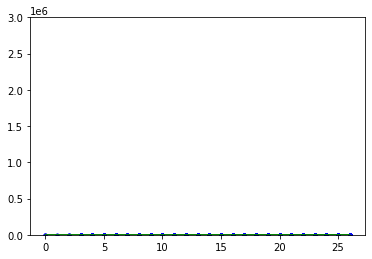

In [17]:
#Régression polynomiale

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x_reg)

# x_reg et y_reg déjà définis au-dessus ce qui fait qu'on est en-dessous de 6 millions
model = LinearRegression()
model.fit(x_poly, y_reg)
y_poly_pred = model.predict(x_poly)
 
rmse = np.sqrt(mean_squared_error(y_reg,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
print(rmse)
#print(r2)
import operator
plt.scatter(x_reg, y_reg, s=10, color='blue')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_reg,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.ylim(0,0.3*pow(10,7))

plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

## Matrice de correlation  :

C:\Users\souam\AppData\Local\Temp/ipykernel_3080/599072250.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

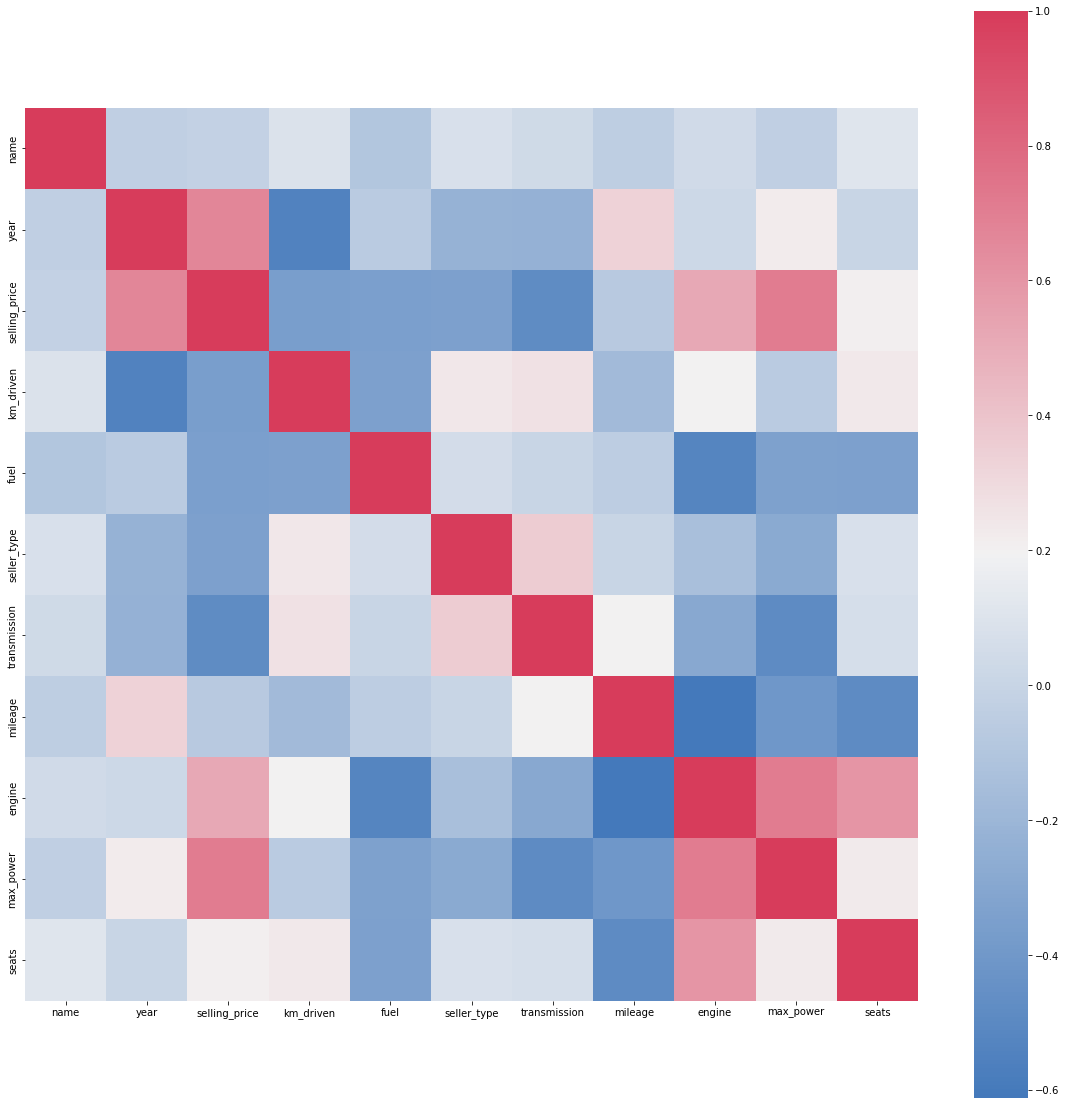

In [18]:
f, ax = plt.subplots(figsize=(20, 20))
corr = cars.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(250, 5, as_cmap=True),
            square=True, ax=ax)

## Division Train / Validation / Test

On supprime tout d'abord les données aberrantes

In [19]:
cars = cars[cars['selling_price']<0.3*pow(10,7)] 

Et on passe à la division

In [20]:
from sklearn.model_selection import train_test_split

X = cars[['year','km_driven','fuel','seller_type','transmission','mileage','engine','max_power','seats']] # on devra traiter les attributs string
y = cars['selling_price'] # variable de prédiction

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=1345) # on stocke dans des valeurs de sortie, random_state pour éviter que ça ne change

## Modèles

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

mlr = LinearRegression()  
mlr.fit(X_train, y_train)

print("Ordonnée à l'origine : ", mlr.intercept_)
print("Coefficients:")
coeffs = list(zip(x, mlr.coef_)) 
print(coeffs,'\n')



y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

# compare
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

Ordonnée à l'origine :  -112.6048275369551
Coefficients:
[(20, 18.92729589732742), (20, -0.09613166791559069), (12, -48.72217622975109), (16, -19.106494404355495), (13, -46.59463395185281), (23, 0.03175016689980369), (7, 0.6770003100424522), (17, 0.8730224884486868), (19, 5.856324103202817)] 

Prediction for test set: [201.01295842 486.97421752 301.95415265 ... 108.93183853 225.44986651
 664.86668591]


,Actual value,Predicted value
4882,163,201.012958
6889,508,486.974218
489,252,301.954153
6698,39,-58.146614
6978,301,334.215560


In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_jobs=-1)
regressor.fit(cars.drop('selling_price', axis =1), cars.selling_price)
print(regressor.score(cars.drop('selling_price', axis =1), cars.selling_price))

0.9910142560323475


## To-do list

#### _Faire des analyses ?_
#### _Import du modèle_